# Evolutionary Strategies
### ref : Deep Reinforcement Learning _in Action_ 
#### Chapter 6 Evolutionary Strategies

In [1]:
import warnings; warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gym

Creating an Agent

In [3]:
env = gym.make('CartPole-v1')

In [4]:
def init_random_agent_weights(state_space=4, action_space=2):
    return [
        torch.rand(state_space, 10), # fc1 weights
        torch.rand(10),  # fc1 bias
        torch.rand(10, 10),  # fc2 weights
        torch.rand(10),  # fc2 bias
        torch.rand(10, action_space),  # fc3 weights
        torch.rand(action_space),  # fc3 bias
    ]

def get_action_from_agent_weights(agent_weight, state):
    x = F.relu(torch.add(torch.mm(torch.Tensor(state.reshape(1,-1)), agent_weight[0]), agent_weight[1]))
    x = F.relu(torch.add(torch.mm(x, agent_weight[2]), agent_weight[3]))
    act_prob = F.softmax(torch.add(torch.mm(x, agent_weight[4]), agent_weight[5])).detach().numpy()[0]
    action = np.random.choice(range(len(act_prob)), p=act_prob)
    return action

Determining the Agent Fitness

In [5]:
def get_fitness(env, agent_weights, max_episode_length=500, trials=5):
    total_reward = 0
    for _ in range(trials):
        observation = env.reset()
        for i in range(max_episode_length):
            action = get_action_from_agent_weights(agent_weights, observation)
            observation, reward, done, info = env.step(action)
            total_reward += reward
            if done: break
    return total_reward / trials


Cross

In [6]:
def cross(agent1_weights, agent2_weights):
    num_params = len(agent1_weights)
    crossover_idx = np.random.randint(0, num_params)
    new_weights = agent1_weights[:crossover_idx] + agent2_weights[crossover_idx:]
    new_weights = mutate(new_weights)
    return new_weights

Mutate

In [7]:
def mutate(new_weights):
    num_params = len(new_weights)
    num_params_to_update = np.random.randint(0, num_params)  # num of params to change
    for i in range(num_params_to_update):
        n = np.random.randint(0, num_params)
        new_weights[n] = new_weights[n] + torch.rand(new_weights[n].size())
    return new_weights

In [8]:
def breed(agent1_weights, agent2_weight, generation_size=10):
    next_generation = [agent1_weights, agent2_weight]
    for _ in range(generation_size - 2):
        next_generation.append(cross(agent1_weights, agent2_weight))
    return next_generation

def reproduce(env, agents_weights, generation_size):
    top_agents_weights = sorted(agents_weights, reverse=True, key=lambda a: get_fitness(env, a))[:2]
    new_agents_weights = breed(top_agents_weights[0], top_agents_weights[1], generation_size)
    return new_agents_weights

In [9]:
n_generations = 100
generation_size = 20
generation_fitness = []
max_fitness = 0

agents = [init_random_agent_weights(), init_random_agent_weights()]

for i in range(n_generations):
    next_generation = reproduce(env, agents, generation_size)
    ranked_generation = sorted([get_fitness(env, a) for a in next_generation], reverse=True)
    avg_fitness = (ranked_generation[0] + ranked_generation[1]) / 2
    print(i, avg_fitness)
    generation_fitness.append(avg_fitness)
    agents = next_generation

0 16.200000000000003
1 38.5
2 42.4
3 55.900000000000006
4 45.2
5 67.4
6 77.0
7 87.9
8 88.30000000000001
9 100.9
10 91.1
11 113.0
12 86.6
13 126.2
14 157.2
15 120.7
16 177.6
17 177.89999999999998
18 270.5
19 417.1
20 473.9
21 500.0
22 500.0
23 500.0
24 500.0
25 500.0
26 500.0
27 500.0
28 500.0
29 500.0
30 500.0
31 500.0
32 500.0
33 500.0
34 500.0
35 500.0
36 500.0
37 500.0
38 500.0
39 500.0
40 500.0
41 500.0
42 500.0
43 500.0
44 500.0
45 500.0
46 500.0
47 500.0
48 500.0
49 500.0
50 500.0
51 500.0
52 500.0
53 500.0
54 500.0
55 500.0
56 500.0
57 500.0
58 500.0
59 500.0
60 500.0
61 500.0
62 500.0
63 500.0
64 500.0
65 500.0
66 500.0
67 500.0
68 500.0
69 500.0
70 500.0
71 500.0
72 500.0
73 500.0
74 500.0
75 500.0
76 500.0
77 500.0
78 500.0
79 500.0
80 500.0
81 500.0
82 500.0
83 500.0
84 500.0
85 500.0
86 500.0
87 500.0
88 500.0
89 500.0
90 500.0
91 500.0
92 500.0
93 500.0
94 500.0
95 500.0
96 500.0
97 500.0
98 500.0
99 500.0


### Plot loss

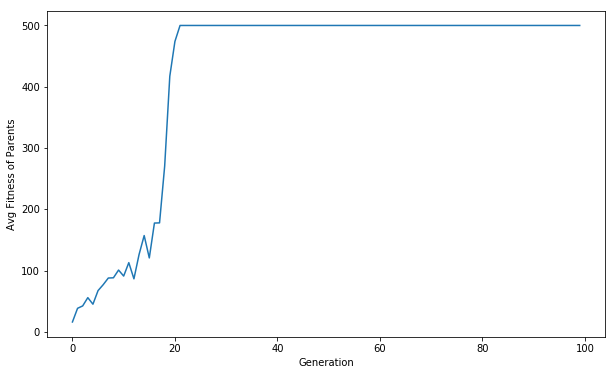

In [10]:
plt.figure(figsize=(10,6))
plt.ylabel("Avg Fitness of Parents")
plt.xlabel("Generation")
plt.plot(generation_fitness)

### Test trained agent

In [11]:
state = torch.from_numpy(env.reset()).float()
done = False
for i in range(200):
    action = get_action_from_agent_weights(agents[0],state)
    state, reward, done, info = env.step(action)
    state = torch.from_numpy(state).float()
    if done:
        print("Game over at time step {}".format(i,))
        break
    env.render()
env.close()